## BIOINFORMATICS THESIS: MULTIMODAL NEURAL NETWORK

# CELL LINE: HEPG2

In [1]:
import pandas as pd 
import numpy as np
import os

import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from collections import defaultdict, OrderedDict
import pickle

import sqlite3
from sqlalchemy import create_engine

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
# create a database to store optuna studies with sqlite backend
#engine = create_engine('sqlite:///BIOINF_optuna_tuning.db')

In [3]:
from BIOINF_tesi.data_pipe import CELL_LINES, TASKS

In [4]:
cell_line = CELL_LINES[4]
cell_line

'HEPG2'

---

In [5]:
from BIOINF_tesi.data_pipe import Load_Create_Task
from BIOINF_tesi.data_pipe import Build_DataLoader_Pipeline

In [6]:
from BIOINF_tesi.models import FFNN, CNN, CNN_LSTM
from BIOINF_tesi.models.utils import fit, Param_Search, Kfold_CV, plot_scores

In [7]:
with open ('results_dict.pickle', 'rb') as fin:
    results_dict = pickle.load(fin)
    results_dict = defaultdict(lambda: defaultdict(dict), results_dict)

## 1) ACTIVE ENHANCERS vs INACTIVE ENHANCERS

In [7]:
task = TASKS[0]
task

'active_E_vs_inactive_E'

In [8]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


### 1. FFNN

In [10]:
model=FFNN

In [11]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=False,
                rebalancing=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:29:43,331] Using an existing study with name 'HEPG2_active_E_vs_inactive_E_FFNN_1' instead of creating a new one.


Study statistics: 
  Number of finished trials:  4
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.30246773255512566
  Params: 
    dropout_l0: 0.3
    dropout_l1: 0.4
    dropout_l2: 0.4
    lr: 0.0002751637345988326
    n_layers: 3
    n_units_l0: 64
    n_units_l1: 64
    n_units_l2: 64
    optimizer: RMSprop
    weight_decay: 0.006532121861557937

===============> MODEL TESTING


/opt/anaconda3/lib/python3.8/site-packages/optuna/structs.py:18: FutureWarning: `structs` is deprecated. Classes have moved to the following modules. `structs.StudyDirection`->`study.StudyDirection`, `structs.StudySummary`->`study.StudySummary`, `structs.FrozenTrial`->`trial.FrozenTrial`, `structs.TrialState`->`trial.TrialState`, `structs.TrialPruned`->`exceptions.TrialPruned`.
  warnings.warn(_message, FutureWarning)


AUPRC test score: 0.27310734138670323


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:29:43,758] Using an existing study with name 'HEPG2_active_E_vs_inactive_E_FFNN_1_2' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.28259727988125605
  Params: 
    dropout_l0: 0.3
    dropout_l1: 0.4
    dropout_l2: 0.0
    lr: 0.00023647779728299236
    n_layers: 3
    n_units_l0: 64
    n_units_l1: 16
    n_units_l2: 32
    optimizer: Adam
    weight_decay: 0.00018196473815629665

===============> MODEL TESTING
AUPRC test score: 0.2950961664444564


>>> ITERATION N. 3


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:29:44,112] Using an existing study with name 'HEPG2_active_E_vs_inactive_E_FFNN_1_2_3' instead of creating a new one.



===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.2951257922180448
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0.4
    lr: 0.0021994398341532444
    n_layers: 2
    n_units_l0: 128
    n_units_l1: 32
    optimizer: Nadam
    weight_decay: 0.00013970265972714527

===============> MODEL TESTING
AUPRC test score: 0.26283101020388605



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.27701


In [12]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [13]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---
### 2. CNN

In [10]:
model=CNN

In [11]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=True,
                rebalancing=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 12:31:25,607] Using an existing study with name 'HEPG2_active_E_vs_inactive_E_CNN_1' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING


/opt/conda/lib/python3.7/site-packages/optuna/structs.py:18: FutureWarning: `structs` is deprecated. Classes have moved to the following modules. `structs.StudyDirection`->`study.StudyDirection`, `structs.StudySummary`->`study.StudySummary`, `structs.FrozenTrial`->`trial.FrozenTrial`, `structs.TrialState`->`trial.TrialState`, `structs.TrialPruned`->`exceptions.TrialPruned`.
  warnings.warn(_message, FutureWarning)


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.13825465382077576
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0.5
    dropout_l2: 0.5
    kernel_size_l0: 15
    kernel_size_l1: 11
    kernel_size_l2: 5
    lr: 4.485889658704784e-05
    n_layers: 3
    optimizer: Nadam
    out_channels_l0: 16
    out_channels_l1: 32
    out_channels_l2: 96
    weight_decay: 0.032496961963479745

===============> MODEL TESTING


/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 12:31:29,636] Using an existing study with name 'HEPG2_active_E_vs_inactive_E_CNN_1_2' instead of creating a new one.


AUPRC test score: 0.12366088016093559


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.14047032757547648
  Params: 
    dropout_l0: 0.2
    kernel_size_l0: 5
    lr: 0.00036007060553285946
    n_layers: 1
    optimizer: Adam
    out_channels_l0: 32
    weight_decay: 0.008852022299128133

===============> MODEL TESTING
AUPRC test score: 0.14367752436074652


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING


/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 12:31:30,712] Using an existing study with name 'HEPG2_active_E_vs_inactive_E_CNN_1_2_3' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.1444910414145398
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0.4
    dropout_l2: 0.4
    dropout_l3: 0
    kernel_size_l0: 15
    kernel_size_l1: 15
    kernel_size_l2: 11
    kernel_size_l3: 15
    lr: 0.0008010497305147338
    n_layers: 4
    optimizer: RMSprop
    out_channels_l0: 32
    out_channels_l1: 96
    out_channels_l2: 96
    out_channels_l3: 128
    weight_decay: 0.016040049955160587

===============> MODEL TESTING
AUPRC test score: 0.1450743742371683



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.13747


In [12]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [13]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

## 2) ACTIVE PROMOTERS vs INACTIVE PROMOTERS

In [9]:
task = TASKS[1]
task

'active_P_vs_inactive_P'

In [10]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


---

### 1. FFNN

In [16]:
model=FFNN

In [17]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=False,
                rebalancing=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:29:46,879] Using an existing study with name 'HEPG2_active_P_vs_inactive_P_FFNN_1' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.36608951955804225
  Params: 
    dropout_l0: 0.3
    dropout_l1: 0.3
    lr: 0.0003182252665246462
    n_layers: 2
    n_units_l0: 32
    n_units_l1: 128
    optimizer: Nadam
    weight_decay: 0.0002921643805447467

===============> MODEL TESTING
AUPRC test score: 0.36443799700960344


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:29:47,143] Using an existing study with name 'HEPG2_active_P_vs_inactive_P_FFNN_1_2' instead of creating a new one.
/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:29:47,315] Using an existing study with name 'HEPG2_active_P_vs_inactive_P_FFNN_1_2_3' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.3528417088081342
  Params: 
    dropout_l0: 0.3
    dropout_l1: 0.3
    dropout_l2: 0.4
    lr: 5.636442127960079e-05
    n_layers: 3
    n_units_l0: 64
    n_units_l1: 128
    n_units_l2: 32
    optimizer: Adam
    weight_decay: 0.0012035100123673963

===============> MODEL TESTING
AUPRC test score: 0.3585021953383037


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.3358176976484098
  Params: 
    dropout_l0: 0.4
    dropout_l1: 0.2
    dropout_l2: 0.0
    dropout_l3: 0.0
    lr: 0.0033831488205093526
    n_layers: 4
    n_units_l0: 256
    n_units_l1: 64
    n_units_l2: 64
    n_units_l3: 4
    optimizer: Adam
    weight_decay: 0.00013492296512505818

===============> MODEL TESTING
AUPRC test score: 0.

In [18]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [19]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---
### 2. CNN

In [16]:
model=CNN

In [17]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=True,
                rebalancing=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 12:31:35,137] Using an existing study with name 'HEPG2_active_P_vs_inactive_P_CNN_1' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.23354402933981974
  Params: 
    dropout_l0: 0.3
    dropout_l1: 0.4
    kernel_size_l0: 5
    kernel_size_l1: 11
    lr: 3.2006512887678235e-05
    n_layers: 2
    optimizer: RMSprop
    out_channels_l0: 32
    out_channels_l1: 96
    weight_decay: 0.000915727720305847

===============> MODEL TESTING
AUPRC test score: 0.22962875044801676




/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 12:31:36,559] Using an existing study with name 'HEPG2_active_P_vs_inactive_P_CNN_1_2' instead of creating a new one.


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.2551033291543159
  Params: 
    dropout_l0: 0
    dropout_l1: 0.5
    dropout_l2: 0
    dropout_l3: 0.4
    kernel_size_l0: 11
    kernel_size_l1: 5
    kernel_size_l2: 15
    kernel_size_l3: 11
    lr: 0.0005022867967622865
    n_layers: 4
    optimizer: RMSprop
    out_channels_l0: 64
    out_channels_l1: 64
    out_channels_l2: 256
    out_channels_l3: 512
    weight_decay: 0.003517590348961509

===============> MODEL TESTING


/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 12:31:37,894] Using an existing study with name 'HEPG2_active_P_vs_inactive_P_CNN_1_2_3' instead of creating a new one.


AUPRC test score: 0.1806288908533526


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.24279100109841784
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0.5
    kernel_size_l0: 11
    kernel_size_l1: 11
    lr: 0.0002251988425355817
    n_layers: 2
    optimizer: Adam
    out_channels_l0: 16
    out_channels_l1: 32
    weight_decay: 0.005141168484349343

===============> MODEL TESTING
AUPRC test score: 0.24401198807632757



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.21809


In [18]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [19]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

## 3) ACTIVE ENHANCERS vs ACTIVE PROMOTERS

In [11]:
task = TASKS[2]
task

'active_E_vs_active_P'

In [12]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


---
### 1. FFNN

In [22]:
model=FFNN

In [23]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=False,
                rebalancing=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:29:51,683] Using an existing study with name 'HEPG2_active_E_vs_active_P_FFNN_1' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:29:51,912] Using an existing study with name 'HEPG2_active_E_vs_active_P_FFNN_1_2' instead of creating a new one.
/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:29:51,998] Using an existing study with name 'HEPG2_active_E_vs_active_P_FFNN_1_2_3' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.7705184516710489
  Params: 
    dropout_l0: 0.4
    dropout_l1: 0.3
    lr: 0.0012553604113786918
    n_layers: 2
    n_units_l0: 32
    n_units_l1: 16
    optimizer: RMSprop
    weight_decay: 0.001797821834460632

===============> MODEL TESTING
AUPRC test score: 0.7675287883751185


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.7966589832684886
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0.2
    dropout_l2: 0.5
    lr: 0.0014106447213438282
    n_layers: 3
    n_units_l0: 32
    n_units_l1: 16
    n_units_l2: 16
    optimizer: Nadam
    weight_decay: 0.009287629461518369

===============> MODEL TESTING
AUPRC test score: 0.7531940169435164


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING

In [24]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [25]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---
### 2. CNN

In [22]:
model=CNN

In [23]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=True,
                rebalancing=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 12:31:40,751] Using an existing study with name 'HEPG2_active_E_vs_active_P_CNN_1' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.7031540286195637
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0.4
    kernel_size_l0: 5
    kernel_size_l1: 15
    lr: 0.00010934361871147763
    n_layers: 2
    optimizer: RMSprop
    out_channels_l0: 64
    out_channels_l1: 96
    weight_decay: 0.027911574472137584

===============> MODEL TESTING
AUPRC test score: 0.6843950611521797




/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 12:31:42,236] Using an existing study with name 'HEPG2_active_E_vs_active_P_CNN_1_2' instead of creating a new one.


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.6552679963286622
  Params: 
    dropout_l0: 0.3
    dropout_l1: 0
    kernel_size_l0: 5
    kernel_size_l1: 15
    lr: 0.0077522242979353746
    n_layers: 2
    optimizer: Nadam
    out_channels_l0: 16
    out_channels_l1: 96
    weight_decay: 0.03176760255997395

===============> MODEL TESTING


/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 12:31:43,431] Using an existing study with name 'HEPG2_active_E_vs_active_P_CNN_1_2_3' instead of creating a new one.


AUPRC test score: 0.611078320683236


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.7089016977869563
  Params: 
    dropout_l0: 0.4
    dropout_l1: 0.5
    kernel_size_l0: 5
    kernel_size_l1: 11
    lr: 0.00048063565307072297
    n_layers: 2
    optimizer: Nadam
    out_channels_l0: 32
    out_channels_l1: 32
    weight_decay: 0.016380056586270113

===============> MODEL TESTING
AUPRC test score: 0.6885506987937348



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.66134


In [24]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [25]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

## 4) INACTIVE ENHANCERS vs INACTIVE PROMOTERS

In [13]:
task = TASKS[3]
task

'inactive_E_vs_inactive_P'

In [14]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


---
### 1. FFNN

In [28]:
model=FFNN

In [29]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=False,
                rebalancing=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

>>> ITERATION N. 1


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:29:55,636] Using an existing study with name 'HEPG2_inactive_E_vs_inactive_P_FFNN_1' instead of creating a new one.



===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5885643242798053
  Params: 
    dropout_l0: 0.4
    dropout_l1: 0.0
    dropout_l2: 0.4
    lr: 0.003289156104898304
    n_layers: 3
    n_units_l0: 64
    n_units_l1: 16
    n_units_l2: 16
    optimizer: RMSprop
    weight_decay: 0.0004364986683894866

===============> MODEL TESTING
AUPRC test score: 0.5913131626725182


>>> ITERATION N. 2


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:29:56,376] Using an existing study with name 'HEPG2_inactive_E_vs_inactive_P_FFNN_1_2' instead of creating a new one.



===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5757882018786497
  Params: 
    dropout_l0: 0.0
    dropout_l1: 0.0
    dropout_l2: 0.4
    lr: 0.00022350904618234039
    n_layers: 3
    n_units_l0: 128
    n_units_l1: 64
    n_units_l2: 4
    optimizer: Adam
    weight_decay: 0.0017387785562133038

===============> MODEL TESTING
AUPRC test score: 0.5881838278528447


>>> ITERATION N. 3


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:29:57,079] Using an existing study with name 'HEPG2_inactive_E_vs_inactive_P_FFNN_1_2_3' instead of creating a new one.



===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.593631942556033
  Params: 
    dropout_l0: 0.0
    dropout_l1: 0.0
    dropout_l2: 0.4
    lr: 0.001091750594439732
    n_layers: 3
    n_units_l0: 32
    n_units_l1: 16
    n_units_l2: 32
    optimizer: Nadam
    weight_decay: 0.0005246323876219314

===============> MODEL TESTING
AUPRC test score: 0.5938093934064081



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.5911


In [30]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [31]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---
### 2. CNN

In [28]:
model=CNN

In [29]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=True,
                rebalancing=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 12:31:56,175] Using an existing study with name 'HEPG2_inactive_E_vs_inactive_P_CNN_1' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5770107015799703
  Params: 
    dropout_l0: 0.4
    kernel_size_l0: 5
    lr: 9.730003394256964e-05
    n_layers: 1
    optimizer: Adam
    out_channels_l0: 64
    weight_decay: 0.06370164321659752

===============> MODEL TESTING
AUPRC test score: 0.560632709795682




/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 12:31:58,179] Using an existing study with name 'HEPG2_inactive_E_vs_inactive_P_CNN_1_2' instead of creating a new one.


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5598701725625022
  Params: 
    dropout_l0: 0
    dropout_l1: 0.4
    dropout_l2: 0
    dropout_l3: 0
    kernel_size_l0: 15
    kernel_size_l1: 5
    kernel_size_l2: 11
    kernel_size_l3: 5
    lr: 0.050622547006742354
    n_layers: 4
    optimizer: Adam
    out_channels_l0: 16
    out_channels_l1: 96
    out_channels_l2: 64
    out_channels_l3: 256
    weight_decay: 0.00039610236754678913

===============> MODEL TESTING


/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 12:31:59,072] Using an existing study with name 'HEPG2_inactive_E_vs_inactive_P_CNN_1_2_3' instead of creating a new one.


AUPRC test score: 0.5260731464241128


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5840827259793019
  Params: 
    dropout_l0: 0
    kernel_size_l0: 11
    lr: 0.00030306756723582907
    n_layers: 1
    optimizer: Nadam
    out_channels_l0: 64
    weight_decay: 0.02474566073404882

===============> MODEL TESTING
AUPRC test score: 0.5812380950966081



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.55598


In [30]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [31]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

## 5) ACTIVE ENHANCERS + ACTIVE PROMOTERS vs INACTIVE REST

In [15]:
task = TASKS[4]
task

'active_EP_vs_inactive_rest'

In [16]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


---
### 1. FFNN

In [34]:
model = FFNN

In [ ]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=False,
                rebalancing=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

>>> ITERATION N. 1


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:29:59,284] Using an existing study with name 'HEPG2_active_EP_vs_inactive_rest_FFNN_1' instead of creating a new one.



===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.321052896641659
  Params: 
    dropout_l0: 0.2
    lr: 0.0007383437759569108
    n_layers: 1
    n_units_l0: 128
    optimizer: RMSprop
    weight_decay: 0.00022775937514386005

===============> MODEL TESTING
AUPRC test score: 0.31047692071414373


>>> ITERATION N. 2


In [ ]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [ ]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---
### 2. CNN

In [34]:
model=CNN

In [35]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=True,
                rebalancing=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 12:32:18,022] Using an existing study with name 'HEPG2_active_EP_vs_inactive_rest_CNN_1' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.2120917650585651
  Params: 
    dropout_l0: 0.3
    dropout_l1: 0.5
    dropout_l2: 0.4
    kernel_size_l0: 11
    kernel_size_l1: 15
    kernel_size_l2: 5
    lr: 0.0010322473983451375
    n_layers: 3
    optimizer: Adam
    out_channels_l0: 16
    out_channels_l1: 64
    out_channels_l2: 96
    weight_decay: 0.002030351491500817

===============> MODEL TESTING


/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 12:32:19,004] Using an existing study with name 'HEPG2_active_EP_vs_inactive_rest_CNN_1_2' instead of creating a new one.


AUPRC test score: 0.2146806741775473


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.13547873559762624
  Params: 
    dropout_l0: 0.4
    dropout_l1: 0
    dropout_l2: 0
    kernel_size_l0: 11
    kernel_size_l1: 11
    kernel_size_l2: 15
    lr: 1.4207258152150113e-05
    n_layers: 3
    optimizer: Adam
    out_channels_l0: 32
    out_channels_l1: 32
    out_channels_l2: 128
    weight_decay: 0.00020226934791951217

===============> MODEL TESTING


/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 12:32:19,995] Using an existing study with name 'HEPG2_active_EP_vs_inactive_rest_CNN_1_2_3' instead of creating a new one.


AUPRC test score: 0.13214647278688557


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.1990614918983968
  Params: 
    dropout_l0: 0
    dropout_l1: 0
    dropout_l2: 0.5
    kernel_size_l0: 11
    kernel_size_l1: 5
    kernel_size_l2: 5
    lr: 2.0601522434096877e-05
    n_layers: 3
    optimizer: Adam
    out_channels_l0: 64
    out_channels_l1: 32
    out_channels_l2: 96
    weight_decay: 0.048872972135933335

===============> MODEL TESTING
AUPRC test score: 0.20433350483963544



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.18372


In [36]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [37]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

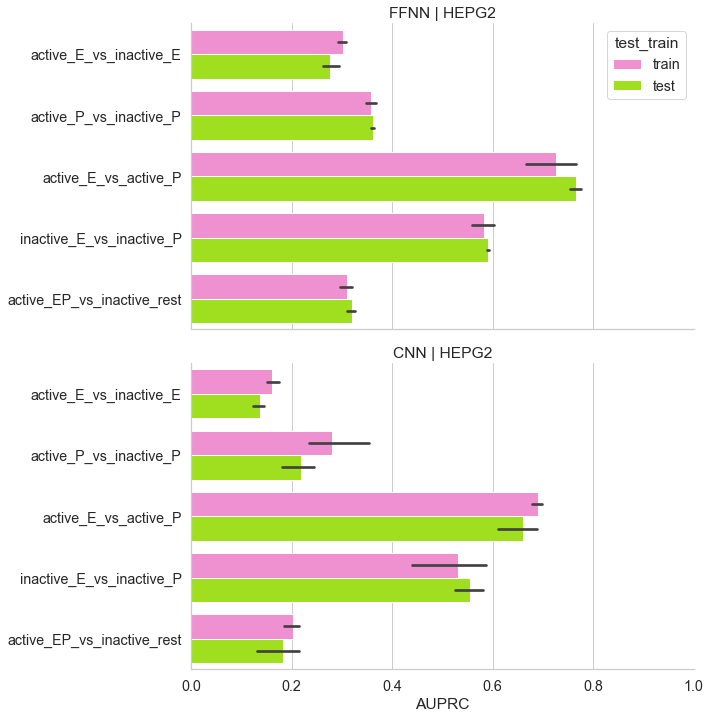

In [7]:
plot_scores(cells=cell_line, models=['FFNN','CNN'])